In [1]:
import json
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from bookdbtool.tools import bookDBTool
from bookdbtool.visualizations import running_total_comparison, yearly_comparisons

In [2]:
config_filename = "myconfig.json"
with open(config_filename, "r") as config_file:
    c = json.load(config_file)
    try:
        UN = c["username"].strip()
        PWD = c["password"].strip()
        DB = c["database"].strip()
        DBHOST = c["host"].strip()
        bt = bookDBTool(DBHOST, UN, PWD, DB)
    except KeyError as e:
        print(e)

In [3]:
df1 = bt.get_dataframe(year="2019").sort_values("LastRead")
df1[["Pages"]].describe().style

,Pages
count,36
mean,334.972
std,107.663
min,122
25%,262.25
50%,323
75%,388
max,624


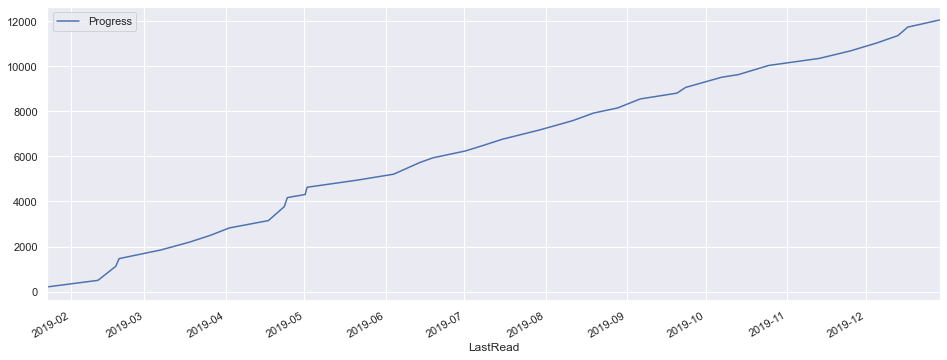

In [4]:
plot_size = [16,6]
df1["Progress"] = df1["Pages"].cumsum()
df1.plot("LastRead", "Progress", figsize=plot_size)

In [5]:
df = bt.get_rank_dataframe()
df.head()

,Year,Pages Read,Rank
0,2019,12059.0,1
1,2010,11712.0,2
2,2005,10117.0,3
3,2003,9430.0,4
4,2007,9099.0,5


In [6]:
df[["Pages Read"]].describe().style

,Pages Read
count,37
mean,5876.76
std,2538.49
min,1508
25%,4535
50%,5405
75%,7103
max,12059


In [7]:
now = df.loc[df.Year == 2020]
print(now)

    Year  Pages Read  Rank
20  2020      5265.0    21


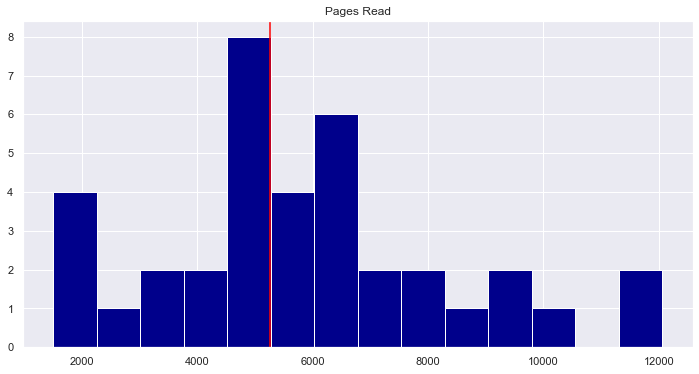

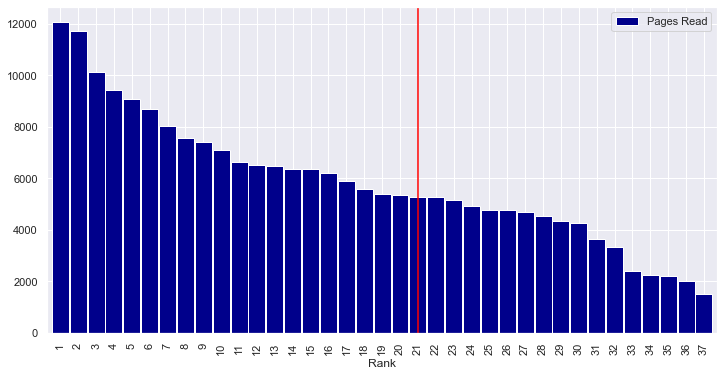

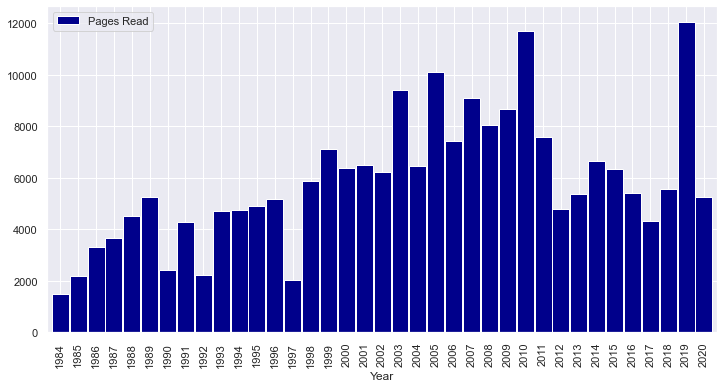

In [8]:
yearly_comparisons(df, 2020)

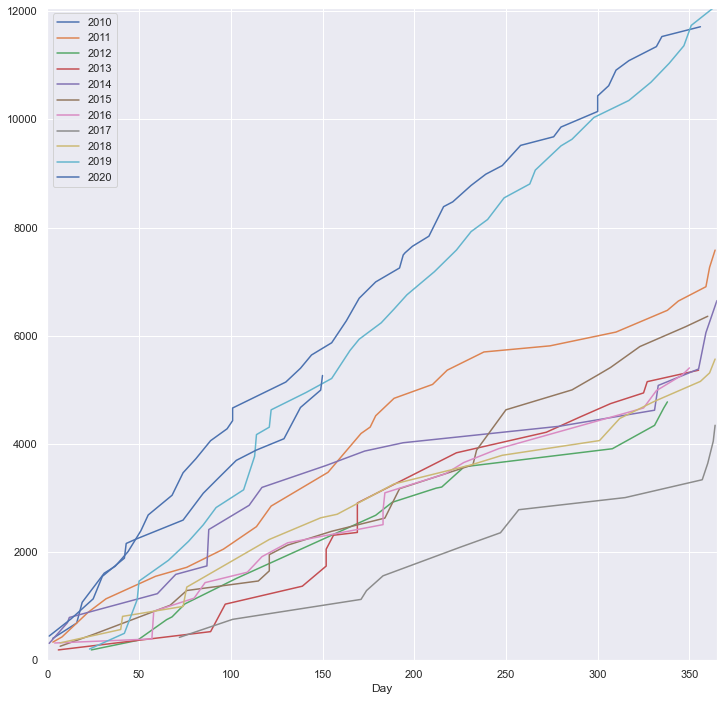

In [9]:
running_total_comparison(bt.get_running_year_dataframe(), window=11)